## World Happiness Report
### Problem Statement:

#### Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### Content

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

#### Inspiration

What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness? How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports? Did any country experience a significant increase or decrease in happiness?

#### What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

#### What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average 2014-2016 life evaluations. These residuals have an average value of approximately zero over the whole set of countries. Figure 2.2 shows the average residual for each country when the equation in Table 2.1 is applied to average 2014- 2016 data for the six variables in that country. We combine these residuals with the estimate for life evaluations in Dystopia so that the combined bar will always have positive values. As can be seen in Figure 2.2, although some life evaluation residuals are quite large, occasionally exceeding one point on the scale from 0 to 10, they are always much smaller than the calculated value in Dystopia, where the average life is rated at 1.85 on the 0 to 10 scale.

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country as stated in the previous answer.

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

In [1]:
# Impoting necessory Libraries:

import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#Preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

#Model Creation :
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score

#Metrics:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [2]:
# READING THE CSV FILE:
data = pd.read_csv("world happiness.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


This is a dataset of world Happiness Report of 155 countries. There are 12 columns, where 11 columns are the Independent Variables (Feature), where 9 out of 11 columns are containing Continuous data and  2 columns consist of Nominal Values (Country and Region)and 1 column consists of Ordinal Value (Happiness Rank). Lastly, 'Happiness score' is the Dependent Variable column (Label). As the label consists of continuous value it's a Regression Problem.

In [3]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

As we can see Country and Region, both the column consist of Nominal values (object datatype), the column Happiness Rank is containing Ordinal Values (integer datatype) and the rest of the columns are containing Continuous values( float datatype). 

In [4]:
data.shape

(158, 12)

Dataset has 158 rows and 12 columns.

Now let's check out the different Column names:

In [5]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Let's check the information features and label:

In [6]:
data.info

<bound method DataFrame.info of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  

Let's check out the Statistics of the dataset:

In [7]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


We can see as the count of each value is 158, so there is no missing value. Data is symmetrically or normally distributed as mean and median close to each other. Each column has Standard deviation close to zero ecept Happiness Rank and Happiness Score. As we can see min value of Economy,Family,Health,Freedom,Trust,Generosity is 0 that is lower than Dystopia Residual, so there may be few outliers present. Other than that there is not much difference in interquartile ranges.

In [8]:
data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

No missing value present in Country & Region column also.

#### Let's see the percentage of frequently occurring Regions and rarely occuring regions for World Happiness Report:

In [9]:
print("Percentage of feaquently occuring Regions & rarely occuring Regions")
print((data['Region'].value_counts()/data['Region'].value_counts().sum())*100)

Percentage of feaquently occuring Regions & rarely occuring Regions
Sub-Saharan Africa                 25.316456
Central and Eastern Europe         18.354430
Latin America and Caribbean        13.924051
Western Europe                     13.291139
Middle East and Northern Africa    12.658228
Southeastern Asia                   5.696203
Southern Asia                       4.430380
Eastern Asia                        3.797468
Australia and New Zealand           1.265823
North America                       1.265823
Name: Region, dtype: float64


So, not all Regions have same kind of Happiness. It is normal to have different frequency in Region according to Happiness.

##### visualization:

Text(0.5, 1.0, 'Percentage of feaquently occuring Regions & rarely occuring Regions')

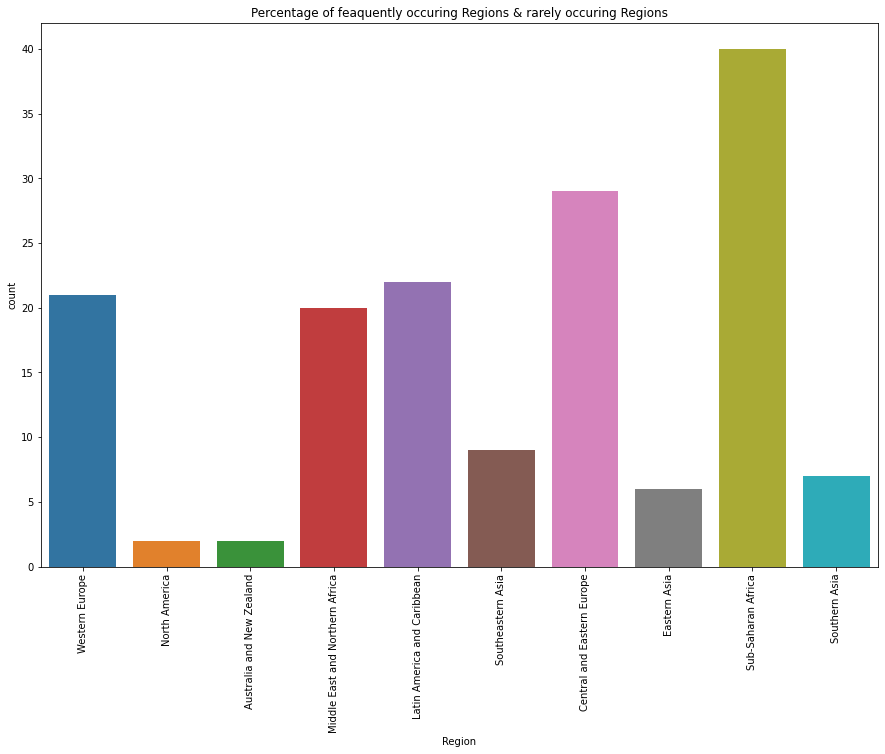

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(data['Region'])
plt.xticks(rotation=90)
plt.title('Percentage of feaquently occuring Regions & rarely occuring Regions')

Sub-Saharan Africa has the highest frequency, Central and Eastern Europe has second highest frequency and Western Europe has third highest frequency regarding Happiness report,out of Nine Regions.

##### Distribution of Continuous data:

In [11]:
# only taking the continuous features:
data_features=data[['Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]

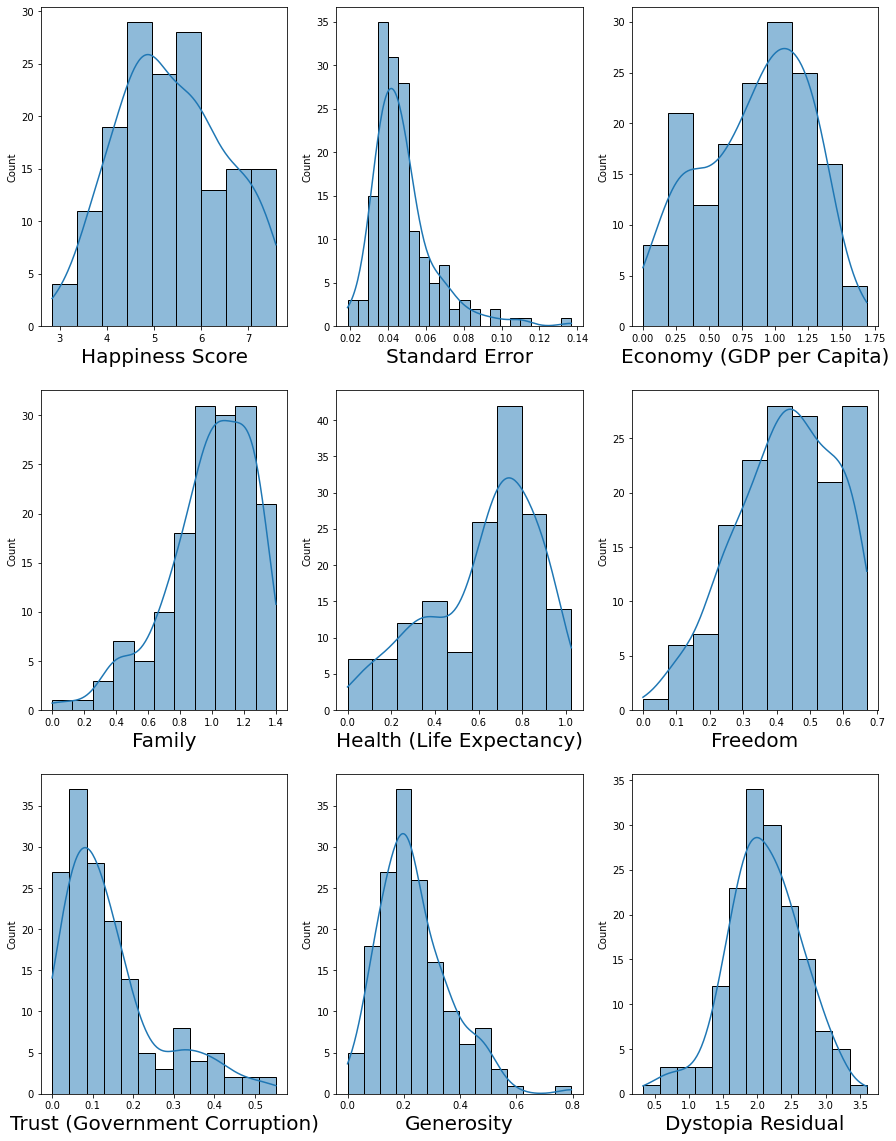

In [12]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in data_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

From above Histograms it can be seen that Dystopia Residual is normally Distributed. Standard Error and Trust(Government Corruption) are right skewed. Whereas other than that all the features have little bit skewness. (Happiness Score is the label data so we don't need to check it's distribution).

##### Outlier Detection:

We are using Boxplot to check outliers.

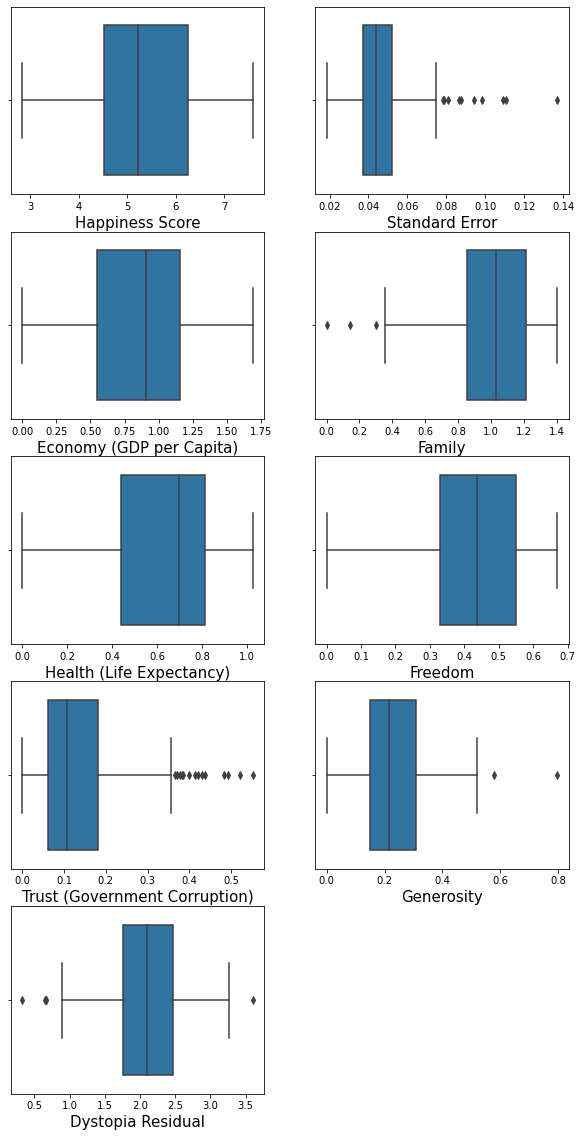

In [13]:
plt.figure(figsize=(10,20),facecolor='white')
plotnumber=1
for column in data_features:
    if plotnumber<=11:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(data_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()  

So, from the above Boxplot we can conclude that there are outliers in, Standard Error and Trust(Government Corruption)and few are in Family,Generosity and Dystopya Residual.

In [14]:
#### DROP Alert: Dropping unnecessory columns:
drop_columns = ['Country']
data = data.drop(columns = drop_columns,axis=1)
data

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


##### Encoding: 
To use Region for Model Creation we need to Encode it with Label Encoder.

In [15]:
data['Region']= LabelEncoder().fit_transform(data['Region'])
data

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


We have encoded the Region column from Object to Integer dtype.

In [16]:
#### dividing the feature and label for further operations:
y = data['Happiness Score']
x = data.drop(columns=['Happiness Score'])
x

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,8,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


As we can see there is no 'Happiness Score'(Label) data in dataset,because we have shifted it to 'y'.

##### visualization of Relation Between Features with Label:

We are using Regression Plot for Visualization. Let's check below,

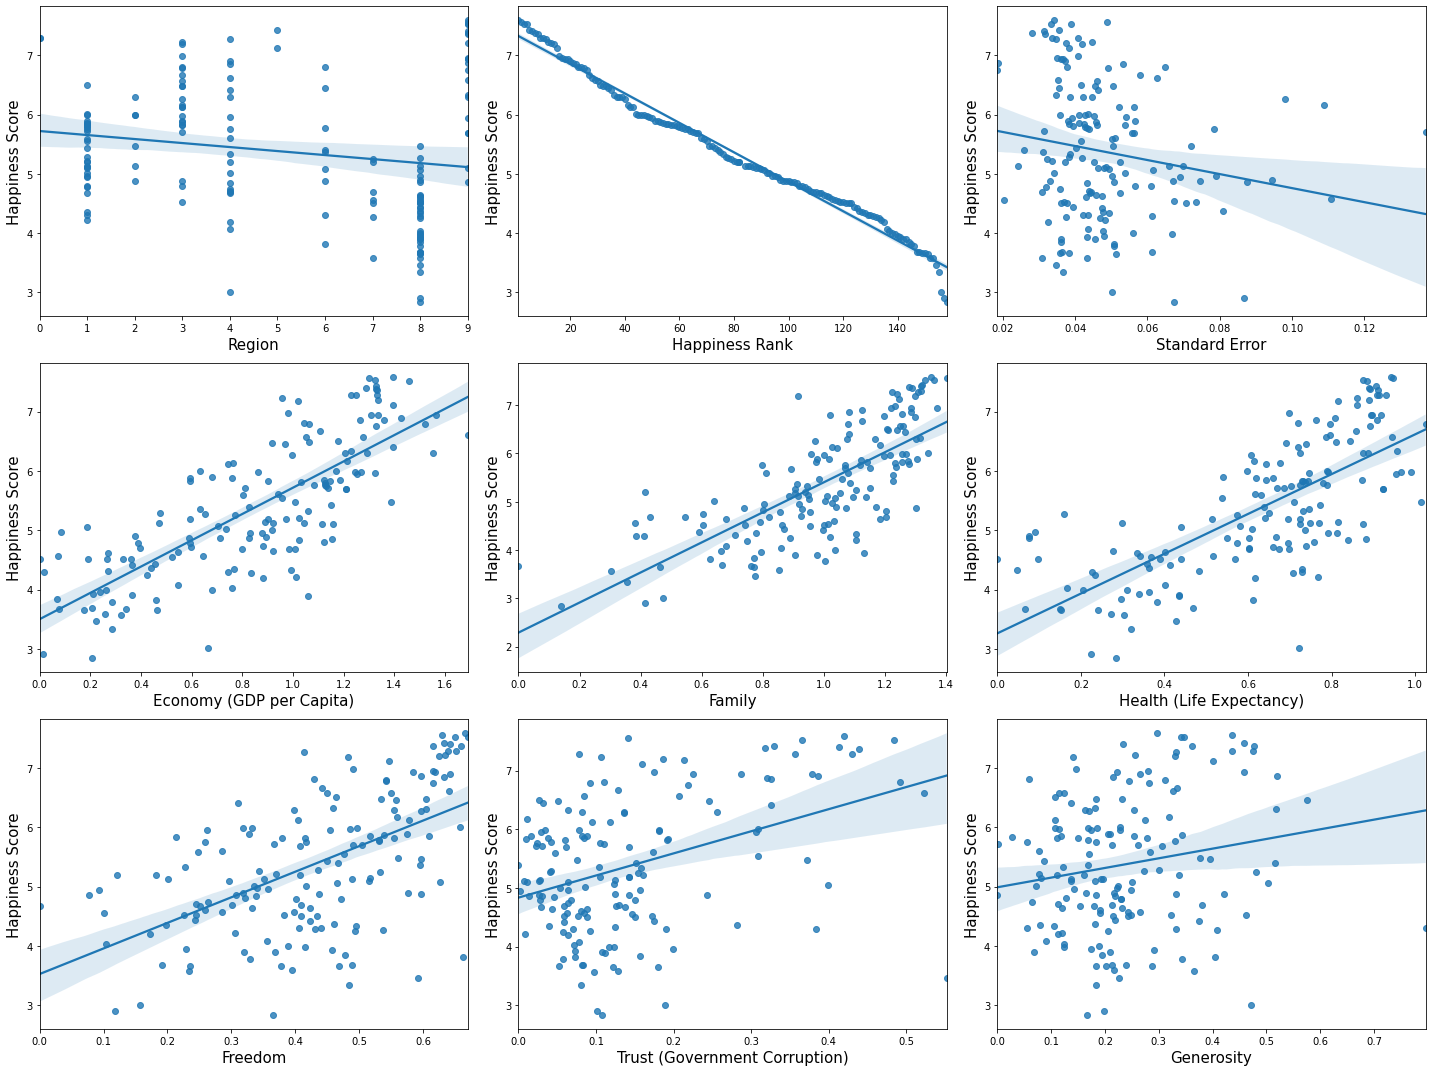

In [17]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.regplot(x[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Happiness Score',fontsize=15)
    plotnumber+=1
plt.tight_layout()  

From above Regression plot we can conclude that,
1. More Happiness score(label) better the happiness rank( as it's a ordinal value) because the country which got the 1st position(as  is less than 155 numerically but ordinally is the top number) in happiness rank got the highest happiness score.
2. More the standard error less Happiness score (Negative Relation),
3. And rest of the features have positive relation with Happiness Score(label). 

Most of the feature has linear relation with the lable data.

##### Outlier Removal:

Now by using Z-Score we will eliminate skewness from the data. By appling Z-score we are going to convert the dataset into Standard Normal distribution. Let's clean the skewness:

In [18]:
from scipy.stats import zscore

In [19]:
z_score = zscore(data[['Standard Error','Trust (Government Corruption)','Generosity']]) #converting data into standard normal distribution
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<2).all(axis=1)

data=data[filtering_entry]
data.describe()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,4.925926,82.770370,5.291481,0.046198,0.833866,0.980284,0.626255,0.413530,0.122766,0.219890,2.094910
std,2.991604,44.140708,1.088192,0.011882,0.383269,0.270843,0.242117,0.146681,0.087966,0.108942,0.561403
min,0.000000,2.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.002270,0.000000,0.328580
25%,2.000000,47.500000,4.515500,0.037895,0.546035,0.853755,0.437975,0.320130,0.060675,0.137335,1.756165
50%,4.000000,82.000000,5.192000,0.044490,0.900190,1.015280,0.696390,0.416910,0.104410,0.208430,2.063670
75%,8.000000,120.500000,5.979500,0.050840,1.128500,1.204605,0.790780,0.530730,0.158180,0.281240,2.452745
max,9.000000,158.000000,7.561000,0.080960,1.563910,1.402230,1.013280,0.669730,0.377980,0.479980,3.602140


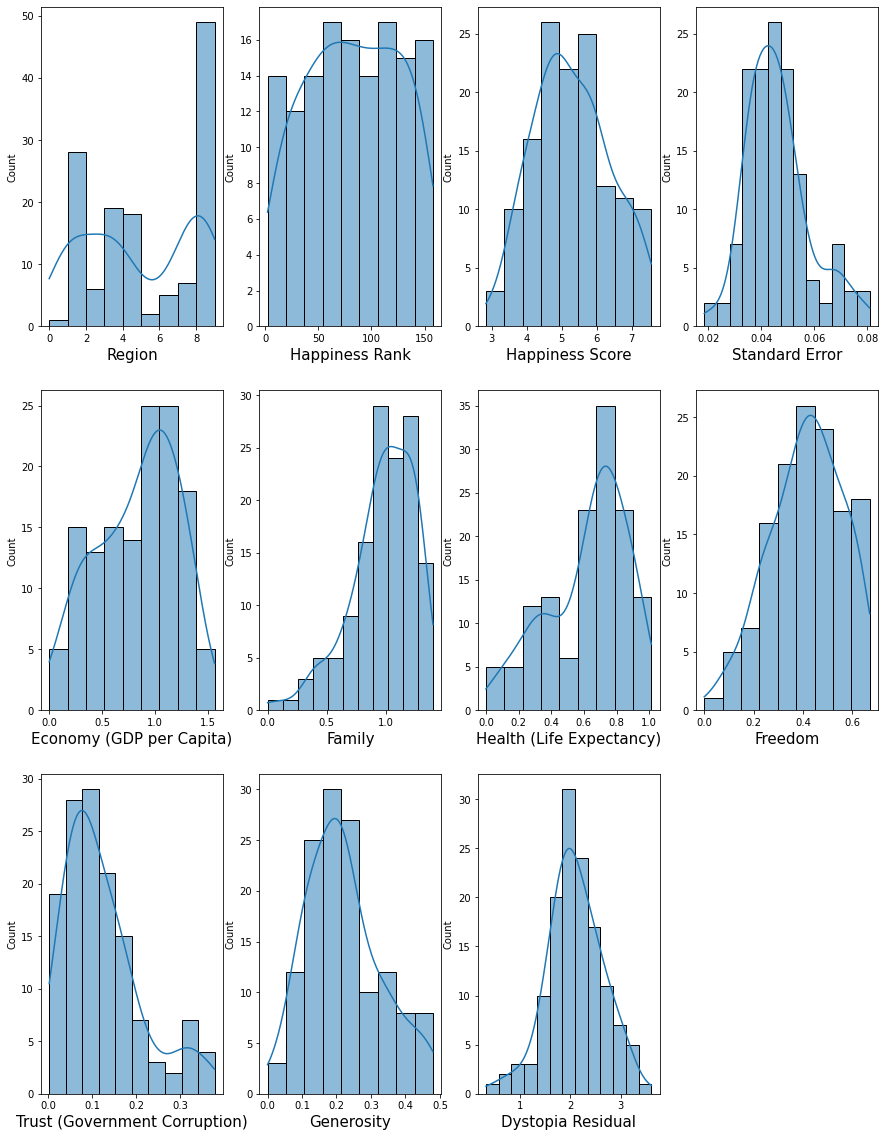

In [20]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()    

As Region is as Ordinal data(categorical data) so we cannot conclude anything regarding distribution plot of Region.
And we can remove some skewness from Standard Error & Trust(Government Corruption).

##### Multicolinearity Detection:
 Let's find the coefficient of multicolinearty to check if any feature is corelated to another featue or not.

In [21]:
corr = data.corr()
corr

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,0.289728,-0.250133,-0.003816,-0.300103,-0.246983,-0.408808,0.080399,0.136673,0.269036,-0.079063
Happiness Rank,0.289728,1.000000,-0.992068,0.165393,-0.759117,-0.704560,-0.730473,-0.490885,-0.368099,-0.092562,-0.545894
Happiness Score,-0.250133,-0.992068,1.000000,-0.174132,0.752885,0.714007,0.714134,0.498595,0.380948,0.117217,0.559203
Standard Error,-0.003816,0.165393,-0.174132,1.000000,-0.177576,-0.120800,-0.243097,-0.091145,-0.031529,-0.008999,-0.022677
Economy (GDP per Capita),-0.300103,-0.759117,0.752885,-0.177576,1.000000,0.634177,0.817267,0.275292,0.277096,-0.065580,0.015618
Family,-0.246983,-0.704560,0.714007,-0.120800,0.634177,1.000000,0.528378,0.386308,0.225523,0.000151,0.104444
Health (Life Expectancy),-0.408808,-0.730473,0.714134,-0.243097,0.817267,0.528378,1.000000,0.276798,0.164952,0.058136,0.030681
Freedom,0.080399,-0.490885,0.498595,-0.091145,0.275292,0.386308,0.276798,1.000000,0.444236,0.347706,0.074478
Trust (Government Corruption),0.136673,-0.368099,0.380948,-0.031529,0.277096,0.225523,0.164952,0.444236,1.000000,0.289261,0.040447
Generosity,0.269036,-0.092562,0.117217,-0.008999,-0.065580,0.000151,0.058136,0.347706,0.289261,1.000000,-0.083365


Let's plot the correlation between feature vs feature and feature vs label by using Heat Map :

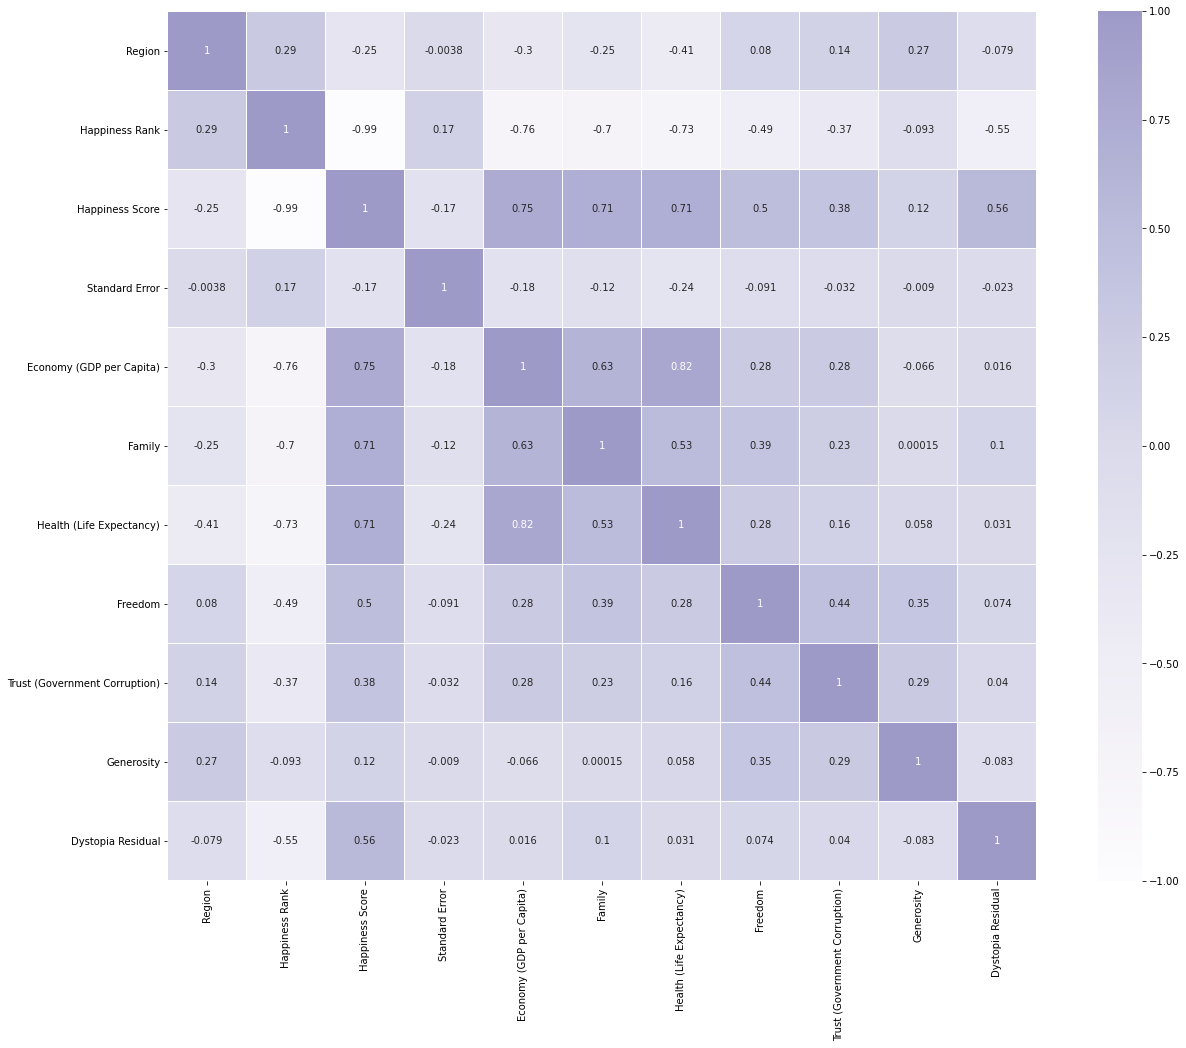

In [22]:
plt.figure(figsize=(22,16))
sns.heatmap(corr,cbar=True,cmap='Purples',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

It seems Economy,Family and Health has correlation. Now we need to use VIF for checking is really there any multicolinearity in the dataset or not,for that first we need to do standardize the data then we can use Variance Inflation Factor.


##### Standardization:

We have already devided the dataset into features and label, lets standardize now:

In [23]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,8,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [24]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.455090,Region
1,74.534606,Happiness Rank
2,1.187792,Standard Error
3,13.204463,Economy (GDP per Capita)
4,5.631962,Family
5,8.025676,Health (Life Expectancy)
6,3.201631,Freedom
7,2.042851,Trust (Government Corruption)
8,2.122792,Generosity
9,17.632286,Dystopia Residual


As there is only 9 features and we shouldn't loose any data from such small dataset, we are going to use all 9 featues. If there will any kind of overfitness, we can remove by using Regularization techniques.

##### Hold Out Method:

Model will be built on Hold Out method(75/25 training and test split)to gauge how well the Regressor is working.

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=21)

### Model Creation:

Now we are going to build 5 different models. And let's check which one is giving us the best Accuray. Those models are:

1. LinearRegression
2. KNeiborsRegressor
3. SVR
4. RandomForestRegressor
5. AdaBoostRegressor

##### 1. Linear Rgression:

In [26]:
#Model Training:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
#Model Prediction with trained data:
y_lr_pred = lr.predict(x_train)

In [28]:
print("R Square Score of lr:",metrics.r2_score(y_train,y_lr_pred))

R Square Score of lr: 0.9999999451038596


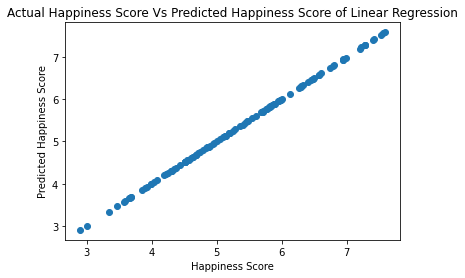

In [29]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_lr_pred)
plt.xlabel('Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual Happiness Score Vs Predicted Happiness Score of Linear Regression')
plt.show()

In [30]:
# Predicting test data with model:
y_test_lr_pred = lr.predict(x_test)

###### Evaluation of LR:

In [31]:
lr_accuracy = metrics.r2_score(y_test,y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)

R Square Score of Linear Regression: 0.9999999347600026


In [32]:
print ('mean absolute error of linear regression is: ',mean_absolute_error(y_test,y_test_lr_pred))

mean absolute error of linear regression is:  0.00026162624035681593


In [33]:
print ('mean squared error of linear regression is: ',mean_squared_error(y_test,y_test_lr_pred))

mean squared error of linear regression is:  9.248732749715894e-08


In [34]:
print ('Root mean squared error of linear regression is: ',np.sqrt(mean_squared_error(y_test,y_test_lr_pred)))

Root mean squared error of linear regression is:  0.0003041172923349788


##### Scores of Linear Regression:

1. Accuracy - 0.9999999347600026
2. MAE of LR -  0.00026162624035681593
3. MSE of LR -  9.248732749715894e-08
4. RMSE of LR - 0.0003041172923349788

#### 2. KNeighbors Regressor:

In [43]:
#Model Training:

kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [44]:
#Model Prediction with trained data:
y_kn_pred = kn.predict(x_train)

In [45]:
print("R Square Score of kn:",metrics.r2_score(y_train,y_kn_pred))

R Square Score of kn: 0.9284373339852909


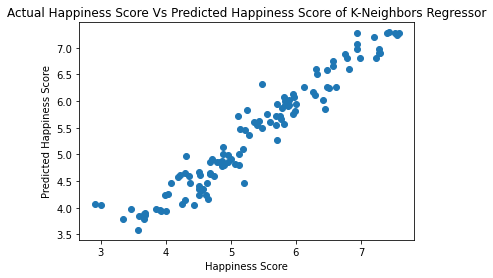

In [46]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_kn_pred)
plt.xlabel('Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual Happiness Score Vs Predicted Happiness Score of K-Neighbors Regressor')
plt.show()

In [47]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)

##### Evaluation of K-Neighbors Regressor:

In [48]:
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)

R Square Score of K-Neighbors Regressor: 0.9214073399914747


In [49]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  0.26098


In [50]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))

mean squared error of K-Neighbors Regressor is:  0.11141669800000002


In [51]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  0.33379139893052967


##### Scores of K-Neighbors Regressor:

1.    Accuracy - 0.9214073399914747
2.    MAE of LR - 0.26098
3.    MSE of LR - 0.11141669800000002
4.    RMSE of LR - 0.33379139893052967



#### 3. Support Vector Regression (SVR) :

In [52]:
#Model Training:
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [53]:
#Model Prediction with trained data:
y_svr_pred = kn.predict(x_train)

In [54]:
print("R Square Score of SVR:",metrics.r2_score(y_train,y_svr_pred))

R Square Score of SVR: 0.9284373339852909


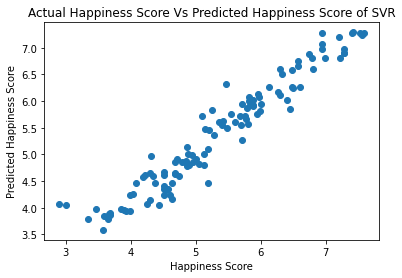

In [55]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_svr_pred)
plt.xlabel('Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual Happiness Score Vs Predicted Happiness Score of SVR')
plt.show()

In [56]:
# Predicting test data with model:
y_test_svr_pred = svr.predict(x_test)

##### Evaluation of SVR:

In [57]:
svr_accuracy = metrics.r2_score(y_test,y_test_svr_pred)
print("R Square Score of SVR:",svr_accuracy)

R Square Score of SVR: 0.9735675270531569


In [58]:
print ('mean absolute error of SVR: ',mean_absolute_error(y_test,y_test_svr_pred))

mean absolute error of SVR:  0.13683359116476165


In [59]:
print ('mean squared error of SVR is: ',mean_squared_error(y_test,y_test_svr_pred))

mean squared error of SVR is:  0.03747193256205007


In [60]:
print ('Root mean squared error of SVR is: ',np.sqrt(mean_squared_error(y_test,y_test_svr_pred)))

Root mean squared error of SVR is:  0.19357668393184668


##### Scores of Support Vector Regression:

1.    Accuracy of SVR : 0.9735675270531569
2.    MAE of SVR : 0.13683359116476165
3.    MSE of SVR : 0.03747193256205007
4.    RMSE of SVR : 0.19357668393184668



#### 4. Random Forest Regressor:

In [61]:
#Model Training:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [62]:
#Model Prediction with trained data:
y_rfr_pred = rfr.predict(x_train)

In [63]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rfr_pred))

R Square Score of Random Forest Regressor: 0.9995660014194996


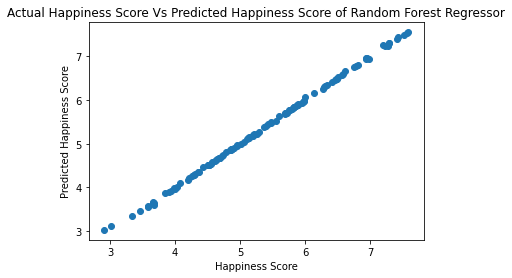

In [64]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rfr_pred)
plt.xlabel('Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual Happiness Score Vs Predicted Happiness Score of Random Forest Regressor')
plt.show()

In [65]:
# Predicting test data with model:
y_test_rfr_pred = rfr.predict(x_test)

##### Evaluation of Random Forest Regressor:

In [66]:
rfr_accuracy = metrics.r2_score(y_test,y_test_rfr_pred)
print("R Square Score of Random Forest Regressor:",rfr_accuracy)

R Square Score of Random Forest Regressor: 0.995718714675802


In [67]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rfr_pred))

mean absolute error of Random Forest Regressor:  0.03753674999999997


In [68]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rfr_pred))

mean squared error of Random Forest Regressor is:  0.006069353982499964


In [69]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rfr_pred)))

Root mean squared error of Random Forest Regressor is:  0.07790605870213153


##### Scores of Random Forest Regressor:

1.    Accuracy of RFR : 0.995718714675802
2.    MAE of RFR :  0.03753674999999997
3.    MSE of RFR : 0.006069353982499964
4.    RMSE of RFR : 0.07790605870213153



#### 5. Ada-Boost Regressor:

In [70]:
# Model Training:
abr = AdaBoostRegressor()
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [71]:
#Model Prediction with trained data:
y_abr_pred = abr.predict(x_train)

In [72]:
print("R Square Score of Ada-Boost Regressor:",metrics.r2_score(y_train,y_abr_pred))

R Square Score of Ada-Boost Regressor: 0.9981433496150472


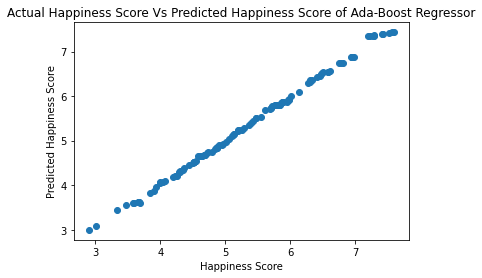

In [73]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_abr_pred)
plt.xlabel('Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual Happiness Score Vs Predicted Happiness Score of Ada-Boost Regressor')
plt.show()

In [74]:
# Predicting test data with model:
y_test_abr_pred = abr.predict(x_test)

##### Evaluation of Ada-Boost Regressor:

In [75]:
abr_accuracy = metrics.r2_score(y_test,y_test_abr_pred)
print("R Square Score of Ada-Boost Regressor:",abr_accuracy)

R Square Score of Ada-Boost Regressor: 0.9953353031416677


In [76]:
print ('mean absolute error of Ada-Boost Regressor: ',mean_absolute_error(y_test,y_test_abr_pred))

mean absolute error of Ada-Boost Regressor:  0.04930363603619886


In [77]:
print ('mean squared error of Ada-Boost Regressor​ is: ',mean_squared_error(y_test,y_test_abr_pred))

mean squared error of Ada-Boost Regressor​ is:  0.006612896434221434


In [78]:
print ('Root mean squared error of Ada-Boost Regressor​ is: ',np.sqrt(mean_squared_error(y_test,y_test_abr_pred)))

Root mean squared error of Ada-Boost Regressor​ is:  0.0813197173766697


##### Scores of Ada-Boost Regressor:

1.    Accuracy of ABR : 0.9953353031416677
2.    MAE of ABR : 0.04930363603619886
3.    MSE of ABR : 0.006612896434221434
4.    RMSE of ABR : 0.0813197173766697



##### Regulalization:
When we use regression models to train some data,there is a good chance the model will overfit the given training dataset. Regularization helps to sort this overfitting problem by restricting the degrees of freedom of a given equation. Regularization constraints the weights of features to avoid overfitting.

##### Regularization using Lasso:

In [35]:
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [36]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

0.00010258130097369185

In [37]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00010258130097369185)

In [38]:
lasso_reg.score(x_test,y_test)

0.9999992043502652

##### Regularization Using Ridge:

In [39]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [40]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.001

In [41]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [42]:
ridge_model.score(x_test,y_test)

0.9999999317027523

Both Lasso and Ridge is giving score of 0.999 as Linear Regression. So, there is no overfitting problem present as such. Let's check overfitting once again using Cross Validation.

#### Evaluating with Cross Validation:

Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.

#### CV of Linear Regression:

In [79]:
lr_cv_score = cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean())

[0.99999994 0.99999993 0.99999989 0.99999995 0.99999993]
mean : 0.999999928627201


#### CV of K-Neighbors Regressor:

In [80]:
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean())

[0.93024736 0.93122893 0.88438999 0.90762772 0.81303041]
mean : 0.8933048833994512


#### CV of SVR:

In [81]:
svr_cv_score = cross_val_score(svr,x_train,y_train,cv=5,scoring='r2')
print(svr_cv_score)
print('mean :',svr_cv_score.mean())

[0.97792015 0.88669579 0.92016579 0.93792751 0.85054539]
mean : 0.9146509236483971


#### CV of Random Forest Regressor:

In [82]:
rfr_cv_score = cross_val_score(rfr,x_train,y_train,cv=5,scoring='r2')
print(rfr_cv_score)
print('mean :',rfr_cv_score.mean())

[0.99826051 0.99655637 0.9972451  0.9864819  0.99131278]
mean : 0.9939713328074697


#### CV of Ada-Boost Regressor:

In [83]:
abr_cv_score = cross_val_score(abr,x_train,y_train,cv=5,scoring='r2')
print(abr_cv_score)
print('mean :',abr_cv_score.mean())

[0.99652229 0.98996892 0.99548313 0.98390602 0.99630582]
mean : 0.9924372362797808


#### Selection of the best model for World Happiness Score Prediction:
Now let's check the difference between Acuuracy Scores and Cross Validation Scores of the models to select the best model out of 5 models.

1. LR = 0.999-0.999 = 0.000, 
2. KN = 0.921-0.893 = 0.028, 
3. SVR = 0.973-0.914 = 0.059,
4. RFR = 0.995-0.994 = 0.001 
5. ABR = 0.995-0.991= 0.004

##### Observation:
So, as the difference of Accuracy Score and CV of Linear Regression is least, it's the best Model according to the result. Let's do Hyperparameter Tuning.


##### Hyperparameter Tuning:
Now we will use Grid Search Technique to tune the hyperparameter with Ridge. After getting the best parameters we can put those into the model to obtain best accuracy.

In [86]:
ridge=Ridge()
parameters={'alpha':[0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,0.091]}
ridge_regressor = GridSearchCV(ridge,parameters,cv=5) 
ridge_regressor.fit(x_train,y_train)                     

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.011, 0.021, 0.031, 0.041, 0.051,
                                   0.061, 0.071, 0.081, 0.091]})

In [87]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.001}
0.9999999258245275


##### Ridge Regression even after hyperparameter tuning gives the same result(0.999) as Linear Regression. So, we are going to save linear Regression Model for predicting World Happiness Score.

In [35]:
# model prediction using Linear Regression
x_predict = list(lr.predict(x_test))
lr_world_happiness = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(lr_world_happiness))

     predicted_values  orignal_values
6            7.378067           7.378
103          4.799526           4.800
62           5.754344           5.754
45           5.987084           5.987
131          4.270555           4.271
145          3.780743           3.781
116          4.564744           4.565
54           5.847671           5.848
23           6.797729           6.798
89           5.073258           5.073
2            7.526963           7.527
20           6.867184           6.867
13           7.187351           7.187
19           6.901384           6.901
91           5.013161           5.013
77           5.268104           5.268
144          3.819134           3.819
75           5.332535           5.332
42           6.122844           6.123
142          3.896440           3.896
108          4.694002           4.694
44           5.995168           5.995
7            7.363576           7.364
88           5.097599           5.098
157          2.839026           2.839
97          

In [36]:
#import joblib
import joblib

joblib.dump(lr,'lr_world_happiness.obj')

# SAVING THE MODEL 

['lr_world_happiness.obj']

In [37]:
lr_from_joblib=joblib.load('lr_world_happiness.obj')
lr_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([7.37806721, 4.79952608, 5.75434369, 5.98708398, 4.27055475,
       3.78074321, 4.56474419, 5.84767147, 6.7977289 , 5.07325805,
       7.52696301, 6.8671841 , 7.18735093, 6.90138383, 5.01316138,
       5.26810352, 3.81913439, 5.33253509, 6.12284359, 3.89643962,
       4.69400232, 5.99516756, 7.36357606, 5.09759941, 2.83902639,
       4.88442675, 6.85296964, 5.19230963, 6.66967784, 3.65508018,
       6.16764769, 5.58871583, 6.29820602, 3.95561679, 7.11950062,
       4.78649529, 4.33211284, 5.12315026, 4.41922683, 4.9711465 ])

#### Conclusion:
World Happiness Report helps us to understand the position of 155 countries regarding Happiness Rank. By Data Analysis we can see there is imbalance in 9 regions regarding Happiness,as Government-corruption,Economy(GDP),Life-Expectancy,Freedom everything is related to achieve happiness in a country. Sub-Saharan Africa has the highest frequency, Central and Eastern Europe has second highest frequency and Western Europe has third highest frequency regarding Happiness report,out of Nine Regions.So, happiness for a nation is linearly related with its Economy,Freedom,Government and other resources. When a country or Region is Economically down or Governmemt is highly corrupted then it's possible that it's Happiness Rank is also low.
So, by building Five different models using all the important features, will be helpful for us to predict a nation's happiness score. And in that case Linear Regression has given us the best possible score(0.99 or 99%). By using that perticular model in the future we can predict the happiness score easily.
